In [3]:
#import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy.linalg import inv
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.colors as colors
from matplotlib import rc
plt.rcParams["font.serif"]       = 'Times New Roman'
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["ytick.minor.size"] = 5
plt.rcParams["xtick.labelsize"]  = 25
plt.rcParams["ytick.labelsize"]  = 25

plt.rcParams["legend.title_fontsize"]=25
import sys

In [13]:
class PerfTime:
    def __init__(self, num_gpu, num_cells, step_1_2_3, step_4, step_5):
        self.num_gpu = num_gpu
        self.num_cells = num_cells
        self.step_1_2_3 = step_1_2_3 #Allgatherv, recursion, copy X,Y_glo to X,Y_loc
        self.step_4 = step_4  #cpu to gpu copy
        self.step_5 = step_5  #parallelFor
        self.total = step_1_2_3 + step_4 + step_5
        self.step_4plus5 = step_4 + step_5


In [24]:
perf_cg = [] #cg for cpu and gpu
perf_cg.append(PerfTime(8,       8000,   0.0004352, 0.0001681, 8.176e-06))
perf_cg.append(PerfTime(64,     64000,    0.003192, 0.0002513, 8.066e-06))

#perf_CG.append(PerfTime(64,     64000, 0.001580052, 0.001639256, 6.2551e-05, 0.004166598, 7.735e-06,       0.048335201, 0.007456192, 0.055791393 ))
#perf_CG.append(PerfTime(512,   512000, 0.018721964, 0.018949163, 6.3612e-05, 0.022048375, 8.296000001e-06, 0.390650499, 0.05979141, 0.450441909))
#perf_CG.append(PerfTime(1024, 1024000, 1.333961667, 0.039387708, 6.5437e-05, 0.042848164, 7.475e-06,       0.798833725, 1.416270451, 2.215104176 ))

perf_c = [] #c for cpu
perf_c.append(PerfTime(8,       8000,   0.002009, 0, 0.04523))
perf_c.append(PerfTime(64,     64000,      0.013, 0, 0.3838))


In [41]:
nGPUs_lst=[]
for i in range(0, len(perf_cg)):
    nGPUs_lst.append(perf_cg[i].num_gpu)
nGPUs = np.asarray(nGPUs_lst)
print(nGPUs)

nCells_lst=[]
for i in range(0, len(perf_cg)):
    nCells_lst.append(perf_cg[i].num_cells)
nCells = np.asarray(nCells_lst)
print(nCells)

[ 8 64]
[ 8000 64000]


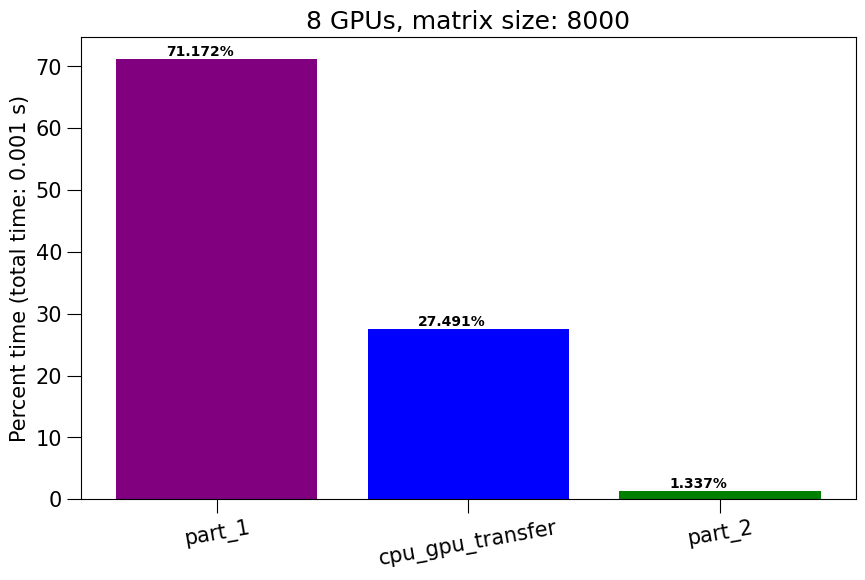

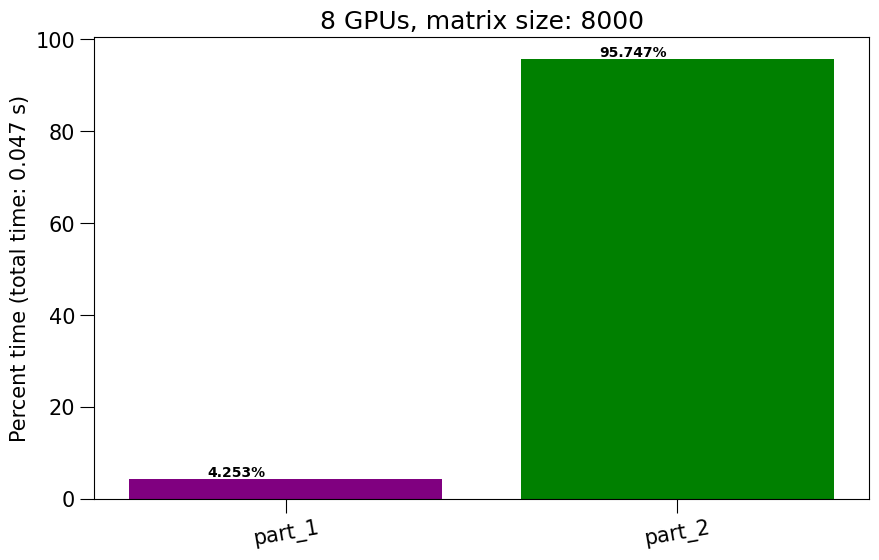

In [37]:
index = 0 #8 GPUs

total_cg = perf_cg[index].total
percent_time_cg = [perf_cg[index].step_1_2_3/total_cg,
                   perf_cg[index].step_4/total_cg,
                   perf_cg[index].step_5/total_cg]
percent_time_cg = np.asarray(percent_time_cg)

fig, ax = plt.subplots()
fig.set_size_inches(10,6)

n_GPUs_str = ['part_1', 'cpu_gpu_transfer', 'part_2']

colors = ['purple', 'blue',  'green']
ax.bar(n_GPUs_str,percent_time_cg*100, color=colors)

ax.set_title('%d GPUs, matrix size: %d'%(perf_cg[index].num_gpu,perf_cg[index].num_cells), fontsize=18)
#ax.set_yscale('log')
plt.xticks(rotation=10)
ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Percent time (total time: %.3f s)'%(perf_cg[index].total), fontsize=15)
for i, v in enumerate(percent_time_cg*100):
    ax.text(i-0.2, v+0.5, "%.3f%%"%(v),
            color = 'k', fontweight = 'bold')
#plt.grid(True)
plt.savefig('Chart_%d_cpu_gpu.png'%(perf_cg[index].num_gpu), bbox_inches = "tight")#




total_c = perf_c[index].total
percent_time_c = [perf_c[index].step_1_2_3/total_c,
                  perf_c[index].step_5/total_c]
percent_time_c = np.asarray(percent_time_c)

fig, ax = plt.subplots()
fig.set_size_inches(10,6)

n_GPUs_str = ['part_1', 'part_2']

colors = ['purple', 'green']
ax.bar(n_GPUs_str,percent_time_c*100, color=colors)

ax.set_title('%d GPUs, matrix size: %d'%(perf_c[index].num_gpu,perf_c[index].num_cells), fontsize=18)
#ax.set_yscale('log')
plt.xticks(rotation=10)
ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Percent time (total time: %.3f s)'%(perf_c[index].total), fontsize=15)
for i, v in enumerate(percent_time_c*100):
    ax.text(i-0.2, v+0.5, "%.3f%%"%(v),
            color = 'k', fontweight = 'bold')
#plt.grid(True)
plt.savefig('Chart_%d_cpu.png'%(perf_c[index].num_gpu), bbox_inches = "tight")#

In [35]:
step_4plus5_cg_lst=[]
for i in range(0, len(perf_cg)):
    step_4plus5_cg_lst.append(perf_cg[i].step_4plus5)
step_4plus5_cg = np.asarray(step_4plus5_cg_lst)
print(step_4plus5_cg)

step_4plus5_c_lst=[]
for i in range(0, len(perf_c)):
    step_4plus5_c_lst.append(perf_c[i].step_4plus5)
step_4plus5_c = np.asarray(step_4plus5_c_lst)
print(step_4plus5_c)

[0.00017628 0.00025937]
[0.04523 0.3838 ]


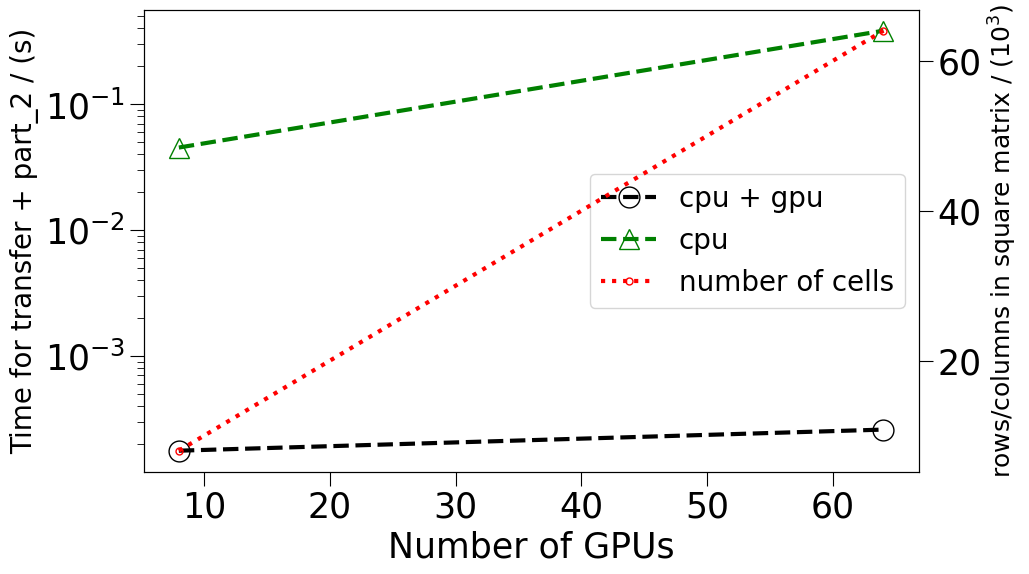

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

fig.patch.set_facecolor('white')
p2 = ax.plot(nGPUs, step_4plus5_c,'g--', linewidth=3,marker='^',markersize=15,fillstyle='none', label='cpu')
p1 = ax.plot(nGPUs, step_4plus5_cg,'k--', linewidth=3,marker='o',markersize=15,fillstyle='none', label='cpu + gpu')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_yscale('log')
ax2=ax.twinx()

p3 = ax2.plot(nGPUs, nCells/1e3,'r:', linewidth=3,marker='o',markersize=5,fillstyle='none', label='number of cells')
#ax2.set_yscale('log')

#ax.set_xlim(0,1200)
#ax.set_ylim(0.1,1.05)

ax.set_ylabel(r'Time for transfer + part_2 / (s)', fontsize=20)
ax.set_xlabel(r'Number of GPUs', fontsize=25)
ax2.set_ylabel(r'rows/columns in square matrix / ($10^3$)', fontsize=18)

lns = p1+p2+p3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='best',prop={'size': 20})
plt.savefig('step_4plus5_time_compare.png', bbox_inches = "tight")#

In [38]:
wse_gpu_lst=[]
wse_cpugpu_lst=[]

baseline_gpu_time = (perf[0].copy_cpu2gpu+perf[0].gpu_pFor)
baseline_total_time = perf[0].total_exclude

for i in range(0, len(perf)):
    ngpu_ratio = perf[i].num_gpu/perf[0].num_gpu

    current_gpu_time = (perf[i].copy_cpu2gpu+perf[i].gpu_pFor)   
    wse_gpu = (baseline_gpu_time*ngpu_ratio)/(current_gpu_time)
    wse_gpu_lst.append(wse_gpu)
    
    current_total_time = perf[i].total_exclude
    wse_total = (baseline_total_time*ngpu_ratio)/(current_total_time)
    wse_cpugpu_lst.append(wse_total)
    
wse_gpu = np.asarray(wse_gpu_lst)
wse_cpugpu = np.asarray(wse_cpugpu_lst)

print(wse_gpu)
print(wse_cpugpu)

[1.         1.7853372  2.70307047 2.78239865]
[1.         2.0039484  1.9991934  0.16880193]


/tmp/ipykernel_19447/3802642807.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,1200)


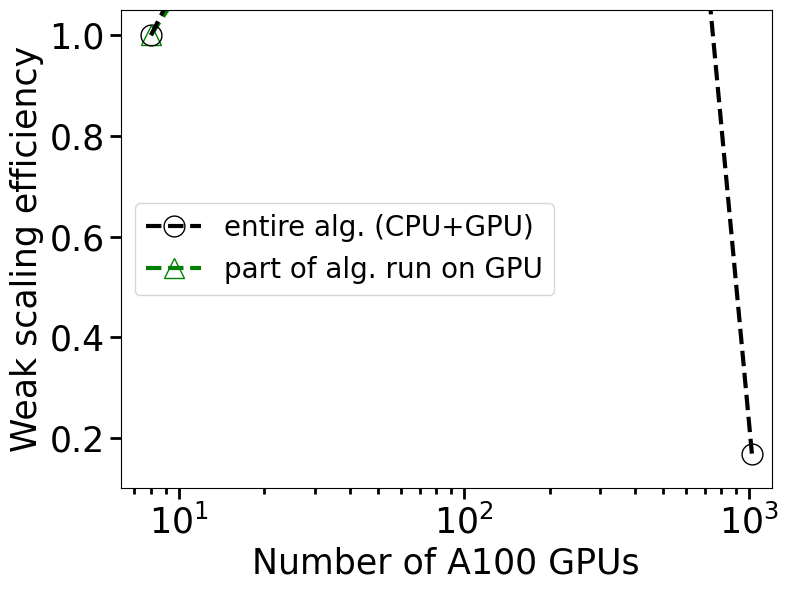

In [39]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.patch.set_facecolor('white')
p2 = ax.plot(nGPUs, wse_gpu,'g--', linewidth=3,marker='^',markersize=15,fillstyle='none', label='part of alg. run on GPU')
p1 = ax.plot(nGPUs, wse_cpugpu,'k--', linewidth=3,marker='o',markersize=15,fillstyle='none', label='entire alg. (CPU+GPU)')
ax.set_xscale('log')

ax.set_xlim(0,1200)
ax.set_ylim(0.1,1.05)

ax.set_ylabel(r'Weak scaling efficiency', fontsize=25)
ax.set_xlabel(r'Number of A100 GPUs', fontsize=25)

#ax2 = ax.twinx() 
#ax2.set_ylim(0,40)
#ax2.set_ylabel(r'Number of cells (billion)', fontsize=25)
#p2=ax2.plot(nGPUs, ncells,'r-.', linewidth=3,marker='^',markersize=15,fillstyle='none',label='number of cells')

lns = p1+p2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center left',prop={'size': 20})

ax.tick_params(which='minor', width=2, length=4, color='k')
ax.tick_params(which='major', width=2, length=8, color='k')
#ax2.tick_params(which='minor', width=2, length=4, color='k')
#ax2.tick_params(which='major', width=2, length=8, color='k')
#ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())
#ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

fig.tight_layout()
plt.savefig('WSE_MatInv.png', bbox_inches = "tight")#